<a href="https://colab.research.google.com/github/BALAJIHARIDASAN/Deep-Learning/blob/main/Artificial_Neural_Network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import os

In [92]:

import tensorflow as tf

In [93]:
tf.__version__

'2.9.2'

In [94]:

tf.keras.__version__

'2.9.0'

In [95]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
mnist = tf.keras.datasets.mnist

In [98]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [99]:
X_train.shape,X_train.dtype

((60000, 28, 28), dtype('uint8'))

In [100]:
X_test.shape,X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [101]:
y_train.shape,y_train.dtype

((60000,), dtype('uint8'))

In [102]:
X_valid,X_train = X_train[:5000]/255,X_train[5000:]/255


In [103]:
y_valid,y_train= y_train[:5000],y_train[5000:]

In [104]:
X_test = X_test/255

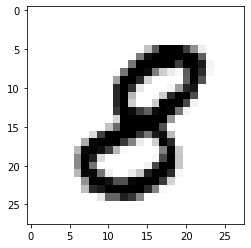

In [139]:
plt.imshow(X_train[5],cmap = 'binary')
plt.show()

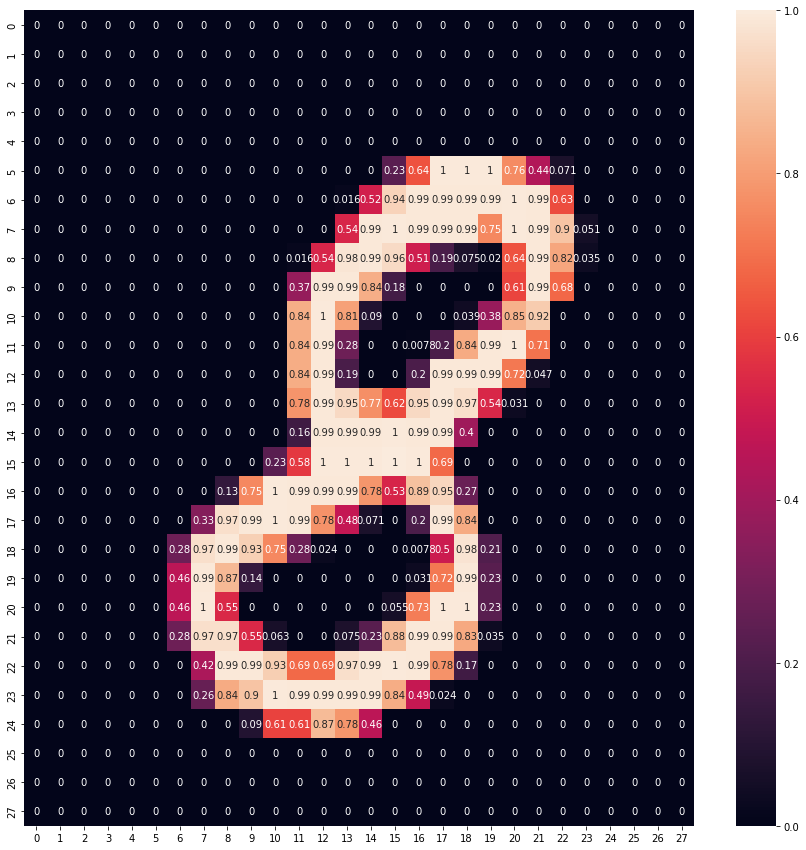

In [140]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(X_train[5],annot = True)
plt.show()

In [107]:
# simple Ann Model 

from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

In [108]:
model = Sequential()
model.add(Flatten(input_shape = [28,28]))
model.add(Dense(300,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [109]:
784*300+300,300*100+100,100*10+10

(235500, 30100, 1010)

In [110]:
235500+30100+1010


266610

In [111]:
model.layers

In [112]:
model.inputs

[<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'flatten_4_input')>]

In [113]:
model.outputs

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_11')>]

In [121]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZERS = 'SGD'
METRICS = ['accuracy']

In [122]:
from tensorflow._api.v2.config import optimizer
model.compile(loss = LOSS_FUNCTION,optimizer= OPTIMIZERS,metrics = METRICS)


In [123]:
EPOCHS = 20
VALIDATION_SET= (X_valid,y_valid)

history = model.fit(X_train,y_train,epochs = EPOCHS,validation_data = VALIDATION_SET)

Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6084 - accuracy: 0.8415 - val_loss: 0.3119 - val_accuracy: 0.9096
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2911 - accuracy: 0.9165 - val_loss: 0.2399 - val_accuracy: 0.9352
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2362 - accuracy: 0.9323 - val_loss: 0.2057 - val_accuracy: 0.9446
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2013 - accuracy: 0.9427 - val_loss: 0.1778 - val_accuracy: 0.9532
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1754 - accuracy: 0.9495 - val_loss: 0.1605 - val_accuracy: 0.9570
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1560 - accuracy: 0.9549 - val_loss: 0.1476 - val_accuracy: 0.9576
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1398 - accuracy: 0.9598 - val_loss: 0.1312 - val_accuracy:

In [124]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9761


[0.08140511810779572, 0.9761000275611877]

In [125]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.608379,0.841473,0.311917,0.9096
1,0.291091,0.916455,0.239858,0.9352
2,0.236173,0.932309,0.205739,0.9446
3,0.201288,0.942655,0.177800,0.9532
4,0.175381,0.949527,0.160458,0.9570
5,0.156000,0.954891,0.147645,0.9576
6,0.139840,0.959836,0.131195,0.9646
7,0.126124,0.964145,0.123143,0.9662
8,0.114302,0.967000,0.114702,0.9696
9,0.104432,0.970036,0.108927,0.9700


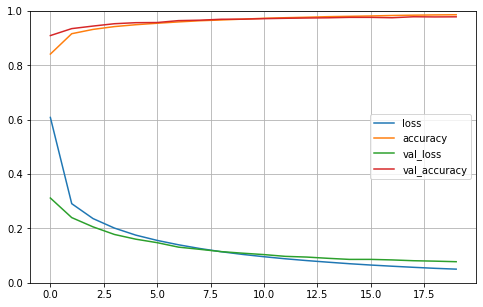

In [126]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [133]:
X_new = X_test[5:8]

In [134]:
y_new = y_test[5:8]


In [135]:
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 15ms/step


In [136]:
y_proba.round(2)

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

In [137]:
y_pred = np.argmax(y_proba,axis =1)
y_pred,y_new

(array([1, 4, 9]), array([1, 4, 9], dtype=uint8))

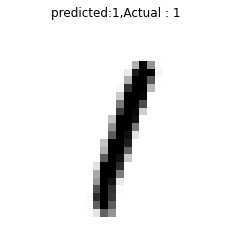

------------


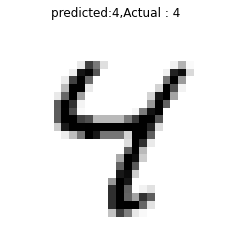

------------


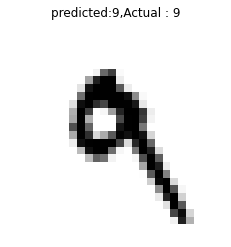

------------


In [138]:
for data,pred,actual in zip(X_new,y_pred,y_new):
  plt.imshow(data,cmap = 'binary')
  plt.title(f'predicted:{pred},Actual : {actual}')
  plt.axis('off')
  plt.show()
  print('---'*4)